

---


# **PART 1**


---






In [ ]:
#CS60050
#MACHINE LEARNING AUTUMN 2020
#ASSIGNMENT 1
#Group No. 083
#20CS60R60 - RAVI PRATAP SINGH
#20CS60R64 - SAHIL JAIN

In [ ]:
#Importing necessary libraries required for program
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random
from pprint import pprint

In [ ]:
# Set background of the charts' to be a dark grid.
%matplotlib inline
sns.set_style("darkgrid")


In [ ]:
#Reading data from csv file 
covid = pd.read_csv("/content/sample_data/IndiaCOVIDStatistics.csv")

#dropping the unnecessary columns Naming Sno and Time
covid.drop(["Sno","Time","State/UnionTerritory"], axis ='columns', inplace = True) 

#for printing the data  data obtained
#covid.head()

In [ ]:
#changing the name of the target attribute to 'label'
covid["label"] = covid.Confirmed
covid= covid.drop("Confirmed", axis=1)

In [ ]:
covid.head

<bound method NDFrame.head of          Date  ConfirmedIndianNational  ...  Deaths  label
0    30/01/20                        1  ...       0      1
1    31/01/20                        1  ...       0      1
2    01/02/20                        2  ...       0      2
3    02/02/20                        3  ...       0      3
4    03/02/20                        3  ...       0      3
..        ...                      ...  ...     ...    ...
441  28/03/20                       34  ...       1     40
442  28/03/20                       46  ...       0     56
443  28/03/20                        4  ...       0      5
444  28/03/20                       54  ...       0     55
445  28/03/20                       15  ...       1     15

[446 rows x 6 columns]>

### TEST-TRAIN Spliting

In [ ]:
#splitting data set in 80/20 splits

# Shuffle your dataset 
shuffle_df = covid.sample(frac=1)

# Define a size for your train set 
train_size = int(0.8 * len(covid))

# Split your dataset 
train = shuffle_df[:train_size]
test= shuffle_df[train_size:]

In [ ]:
#for seeing a subset the values of traning data obtained

data = test.values[:10]
data

array([['12/03/20', 1, 2, 0, 0, 3],
       ['06/03/20', 1, 0, 0, 0, 1],
       ['13/03/20', 1, 0, 0, 0, 1],
       ['18/03/20', 8, 0, 0, 0, 8],
       ['22/03/20', 4, 0, 0, 0, 4],
       ['19/03/20', 14, 0, 0, 1, 14],
       ['11/03/20', 4, 0, 0, 0, 4],
       ['10/03/20', 2, 0, 0, 0, 2],
       ['28/03/20', 38, 0, 1, 1, 38],
       ['25/03/20', 30, 1, 6, 1, 31]], dtype=object)

In [ ]:
#creating leaf node for decision tree regression task
def create_leaf(data, ml_task):
    
    label_column = data[:, -1]
    if ml_task == "regression":
        leaf = np.mean(label_column)
    
    return leaf

In [ ]:
# A utility function for checking purity at each split
def check_purity(data_value):

    #Finding unique values in that column
    label_column = data_value[:, -1]
    unique_classe = np.unique(label_column)

    #checking if length of unique value obtained is equal to 1 or not
    if len(unique_classe) == 1:
        return True
    else:
        return False

### Potential Splits

In [ ]:
#function to get the POTENTIAL SPLITS for our tree
def get_potential_splits(data_value):

    #distinct labels of each column are stored here
    _, n_columns = data_value.shape
    potential_splits = {}
    

    # excluding the last column which is the label
    #beacuse it is target attribute
    for column_idx in range(n_columns - 1):        
        value = data_value[:, column_idx]
        unique_values = np.unique(value) 
        
        potential_splits[column_idx] = unique_values
    #returning the potential split values
    return potential_splits

In [ ]:
#a utlity function for determining best split
def split_data(data_val, split_col, split_val):
     #to check whether column data is cotinuous or discrete 
    split_column_val = data_val[:, split_col]
   

    type_of_feature = FEATURE_TYPES[split_col]
    #if feature id continuous
    if type_of_feature == "continuous":
        above_data = data_val[split_column_val >  split_val]
        below_data = data_val[split_column_val <= split_val]
    
    #if feature is categorical   
    else:
        above_data = data_val[split_column_val != split_val]
        below_data = data_val[split_column_val == split_val]
    
    return below_data, above_data

In [ ]:
#Calculating MEAN SQUARED ERROR to decide 
#to split a node in two or more sub-nodes

def calculate_mse(data_val):
  # storing Actual values fromlast column
    actual_val = data_val[:, -1]
    if len(actual_val) == 0:   # empty data them mse is zero
        mse = 0 

   #else we compare with the predicted value and mean diff. b/w actual value     
    else:
        prediction_val = np.mean(actual_val)
        mse = np.mean((actual_val - prediction_val) **2)
    
    return mse

### ENTROPY Calculation

In [ ]:
#a utility function for averaging over all values
def calculate_overall_metric(below_data, above_data, metric_function):
    x = len(below_data) + len(above_data)
    p_above_data = len(above_data) / x
    p_below_data = len(below_data) / x

    overall_metric =  (p_below_data * metric_function(below_data) 
                     + p_above_data * metric_function(above_data))
    
    return overall_metric

In [ ]:
#a utility function to calculate entropy
def calculate_entropy(data):
    
    label_col = data[:, -1]
    _, counts = np.unique(label_col, return_counts=True)
    
    #entropy formulae
    prob = counts / counts.sum()
    entropy = sum(prob * -np.log2(prob))
     
    return entropy

In [ ]:
#function for determining best split
def determine_best_split(data_val, potential_splits, ml_task):
    
    first_iteration = True
    #iterating over every column index for every value in potential split
    for col_index in potential_splits:
        for val in potential_splits[col_index]:
            below_data, above_data = split_data(data_val, split_col=col_index, split_val=val)
            
            if ml_task == "regression":
                current_overall_metric = calculate_overall_metric(below_data, above_data, metric_function=calculate_mse)
            
            #If we found a lower value in this interation or first index is true
            if first_iteration or current_overall_metric <= best_overall_metric:
                first_iteration = False

                #updating the best metric found till now and also correxending 
                #column index and its value
                best_overall_metric = current_overall_metric
                best_split_col = col_index
                best_split_val = val
    
    return best_split_col, best_split_val

### Decision Tree Algorithm

In [ ]:
#determining type of feature in data attribure column
def determine_type_of_feature(df):
    
    #variable declaration for unique value
    n_unique_val_treshold = 220
    #creating list for storing feature type
    type_of_feature = []
    #loop over every feature in column
    for feature in df.columns:
        #checking if the column is target attribute or not
        if feature != "label":
            unique_val = df[feature].unique()
            example_val = unique_val[0]

            #checking condition for categorial or continuous data
            if (isinstance(example_val, str)) or (len(unique_val) <= n_unique_val_treshold):
                type_of_feature.append("categorical")
            else:
                type_of_feature.append("continuous")
    
    return type_of_feature

#### Algorithm

In [ ]:
sub_tree = {"is_split_required": ["required", 
                         "not_required"]}
def decision_tree_algorithm(df, ml_task, counter=0, min_no_samples=2, max_depth=-1):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df           
    
    
    # base cases
    if (check_purity(data)) or (len(data) < min_no_samples) or (counter == max_depth):
        leaf = create_leaf(data, ml_task)
        return leaf

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = get_potential_splits(data)
        split_col, split_val = determine_best_split(data, potential_splits, ml_task)
        #splitting data in labels
        data_below, data_above = split_data(data, split_col, split_val)
        
        # check for empty data
        if len(data_below) == 0 or len(data_above) == 0:
            leaf = create_leaf(data, ml_task)
            return leaf
        
        # determine is_split_required
        feature_name = COLUMN_HEADERS[split_col]
        type_of_feature = FEATURE_TYPES[split_col]
        if type_of_feature == "continuous":
            is_split_required = "{} <= {}".format(feature_name, split_val)
            
        # feature is categorical
        else:
            is_split_required = "{} = {}".format(feature_name, split_val)
        
        # instantiate sub-tree
        sub_tree = {is_split_required: []}
        
        # find answers (recursion)
        required = decision_tree_algorithm(data_below, ml_task, counter, min_no_samples, max_depth)
        not_required = decision_tree_algorithm(data_above, ml_task, counter, min_no_samples, max_depth)
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_no_samples or max_depth base case).
        if required == not_required:
            sub_tree = required
        else:
            sub_tree[is_split_required].append(required)
            sub_tree[is_split_required].append(not_required)
        
        return sub_tree

#### Printing tree

In [ ]:
#creating decision tree for max_depth =-1
tree = decision_tree_algorithm(train, ml_task="regression", max_depth=-1)
#printing tree
pprint(tree)

{'ConfirmedForeignNational = 0': [{'Deaths = 2': [{'Cured = 3': [55.0, 30.0]},
                                                  {'Deaths = 1': [{'Cured = 3': [{'ConfirmedIndianNational = 41': [41.0,
                                                                                                                   37.0]},
                                                                                 {'ConfirmedIndianNational = 29': [29.0,
                                                                                                                   {'ConfirmedIndianNational = 33': [33.0,
                                                                                                                                                     {'ConfirmedIndianNational = 21': [21.0,
                                                                                                                                                                                       {'ConfirmedIndianNational = 2

In [ ]:
#predictions for test value at position 8 
#(note: position 8 is random every time and there could be anything instead of 8)
example = test.iloc[8]
#printing the predicted value
example

Date                        28/03/20
ConfirmedIndianNational           38
ConfirmedForeignNational           0
Cured                              1
Deaths                             1
label                             38
Name: 439, dtype: object

In [ ]:
#function for prediction taking first data from test sample
def predict_example(example, tree):
    try:
        is_split_required = list(tree.keys())[0]
        feature_name, comparison_operator, value = is_split_required.split(" ")
    except AttributeError:
        return None

    # ask is_split_required
    if comparison_operator == "<=":
        if example[feature_name] <= float(value):
            answer = tree[is_split_required][0]
        else:
            answer = tree[is_split_required][1]
    
    # feature is categorical
    else:
        if str(example[feature_name]) == value:
            answer = tree[is_split_required][0]
        else:
            answer = tree[is_split_required][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return predict_example(example, residual_tree)

In [ ]:
predict_example(example, tree)

7.0

## PART 2


Hyperparameter Tuning for determining best possible  accuracy and depth limit to be used for dataset

###R_Squared Mean value

In [ ]:
#Calculation r squared mean value for the current split
#r squared value  statistical measure of how close 
#the data are to the fitted regression line.
def calculate_r_squared(df, tree):    
    labels = df.label
    mean = labels.mean()
    predictions = df.apply(predict_example, args=(tree,), axis=1)

    ss_res = sum((labels - predictions) ** 2)
    ss_tot = sum((labels - mean) ** 2)
    r_squared = 1 - ss_res / ss_tot
    
    return r_squared

###Find Best Max_Depth

In [ ]:
#Iterating 10(5-55) times to get  best possible split and depth
#Running this cell will take time
#creating node to store parameters
node = {"max_depth": [], "min_no_samples": [], "r_squared_train": [], "r_squared_test": []}

for max_depth in range(1, 11):  
    for min_no_samples in range(5, 55, 5):
        #Construct tree using max_depth
        tree = decision_tree_algorithm(train, ml_task="regression", max_depth=max_depth, min_no_samples=min_no_samples)
        #Calculate 
        r_squared_train = calculate_r_squared(train, tree)
        r_squared_test = calculate_r_squared(test, tree)
        
        node["max_depth"].append(max_depth)
        node["min_no_samples"].append(min_no_samples)
        node["r_squared_train"].append(r_squared_train)
        node["r_squared_test"].append(r_squared_test)
        
    print(f"Progress: Iteration {max_depth}/10")
        
node = pd.DataFrame(node)
node.sort_values("r_squared_test", ascending=False).head()

Progress: Iteration 1/10
Progress: Iteration 2/10
Progress: Iteration 3/10
Progress: Iteration 4/10
Progress: Iteration 5/10
Progress: Iteration 6/10
Progress: Iteration 7/10
Progress: Iteration 8/10
Progress: Iteration 9/10
Progress: Iteration 10/10


,max_depth,min_no_samples,r_squared_train,r_squared_test
93,10,20,0.881738,0.750472
92,10,15,0.884251,0.750259
83,9,20,0.878211,0.747491
82,9,15,0.880724,0.747278
94,10,25,0.876842,0.747143


###Accuracy with best max_depth chosen -

In [ ]:
best_max_depth = 10  # best possible depth limit to be used for your dataset
best_min_samples = 20

#Calculating accuracy of best possible tree with best max_depth
tree = decision_tree_algorithm(train, ml_task="regression", max_depth=best_max_depth, min_no_samples=best_min_samples)
#r_suquare over test data for best possible split and depth
calculate_r_squared(test, tree)

0.6360945315509726

### Plot with Best Max_Depth

In [ ]:
#plot for best possible depth limit for data
def create_plot(df, tree, title):    
    predictions = df.apply(predict_example, args=(tree,), axis=1)
    actual = df.label
    plot_df = pd.DataFrame({"actual": actual, "predictions": predictions})
    
    plot_df.plot(figsize=(15, 5), title=title)
    
    return

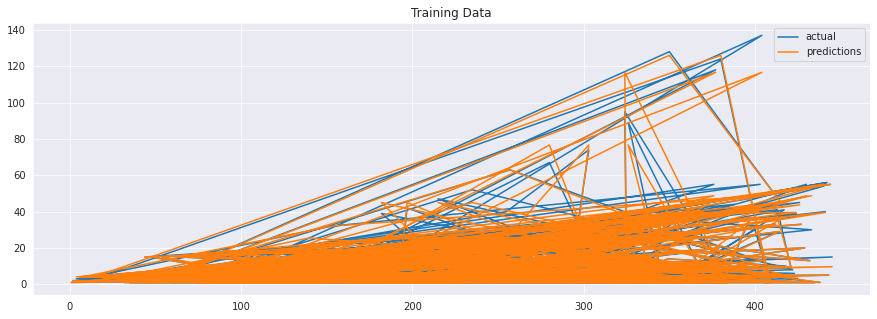

In [ ]:
#plot for training data
create_plot(train, tree, title="Training Data")

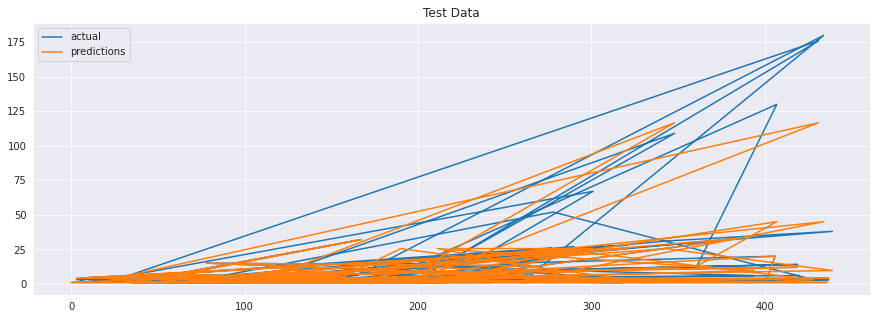

In [ ]:
#plot for testing data
create_plot(test, tree, title="Test Data")

## PART 3

###Filter continuous and categorical Features


In [ ]:
#to filter continuous and categorical feature and split in left/right leaf
def filter_df(df, is_split_required):
    feature, comparison_operator, value = is_split_required.split()
    
    # continuous feature
    if comparison_operator == "<=":
        df_left = df[df[feature] <= float(value)]
        df_right =  df[df[feature] >  float(value)]
        
    # categorical feature
    else:
        df_left = df[df[feature].astype(str) == value]
        df_right  = df[df[feature].astype(str) != value]
    
    return df_left, df_right

### To determine which node to be chosen as leaf

In [ ]:
def determine_leaf(df_train, ml_task):
    
    if ml_task == "regression":
        return df_train.label.mean()

###Make predictions and calculate accuracy after pruning

In [ ]:
###
def make_predictions(df, tree):
    
    if len(df) != 0:
        predictions = df.apply(predict_example, args=(tree,), axis=1)
    else:
        # "df.apply()"" with empty dataframe returns an empty dataframe,
        # but "predictions" should be a series instead
        predictions = pd.Series()
        
    return predictions

In [ ]:
#Calculate Accuracy
def calculate_accuracy(df, tree):
    predictions = make_predictions(df, tree)
    predictions_correct = predictions == df.label
    accuracy = predictions_correct.mean()
    
    return accuracy

In [ ]:
###
def generate_data(n, specific_outliers=[], n_random_outliers=None):
    
    # create data
    data = np.random.random(size=(n, 2)) * 10
    data = data.round(decimals=1)
    df = pd.DataFrame(data, columns=["x", "y"])
    df["label"] = df.x <= 5

    # add specific outlier data points
    for outlier_coordinates in specific_outliers:
        df = df.append({"x": outlier_coordinates[0],
                        "y": outlier_coordinates[1],
                        "label": True}, 
                       ignore_index=True)

    ## add random outlier data points
    if n_random_outliers:
        outlier_x_values =  (6 - 5) * np.random.random(size=n_random_outliers) + 5  # value between 5 and 6
        outlier_y_values = np.random.random(size=n_random_outliers) * 10

        df_outliers = pd.DataFrame({"x": outlier_x_values.round(decimals=2),
                                    "y": outlier_y_values.round(decimals=2),
                                    "label": [True] * n_random_outliers})

        df = df.append(df_outliers, ignore_index=True)
    
    return df


In [ ]:
#function to determine error in the test data set
def determine_errors(df_val, tree, ml_task):
    predictions = make_predictions(df_val, tree)
    #predictions =  predict_example(df_val,tree)
    actual_values = df_val.label
    
    if ml_task == "regression":
        # mean squared error
        return ((predictions - actual_values) **2).mean()

###Pruning Result

In [ ]:
#a function todetermine which gives less error ( before prunig or after pruning)
def pruning_result(tree, df_train, df_val, ml_task):
    
    leaf = determine_leaf(df_train, ml_task)
    errors_leaf = determine_errors(df_val, leaf, ml_task)
    errors_decision_node = determine_errors(df_val, tree, ml_task)

    if errors_leaf <= errors_decision_node:
        return leaf
    else:
        return tree

###Apply Post Pruning

In [ ]:
#function to perform post pruning
def post_pruning(tree, train, test, ml_task):
    
    is_split_required = list(tree.keys())[0]
    required, not_required = tree[is_split_required]

    # base case
    if not isinstance(required, dict) and not isinstance(not_required, dict):
        return pruning_result(tree, train, test, ml_task)
        
    # recursive part
    else:
        df_train_yes, df_train_no = filter_df(train, is_split_required)
        df_val_yes, df_val_no = filter_df(test, is_split_required)
        
        if isinstance(required, dict):
            required = post_pruning(required, df_train_yes, df_val_yes, ml_task)
            
        if isinstance(not_required, dict):
            not_required = post_pruning(not_required, df_train_no, df_val_no, ml_task)
        
        tree = {is_split_required: [required, not_required]}
    
        return pruning_result(tree, train, test, ml_task)

In [ ]:
#tree = decision_tree_algorithm(train, ml_task="regression", max_depth=-1)
tree_pruned = post_pruning(tree,train,test, ml_task="regression")

mse_tree = determine_errors(test, tree, ml_task="regression")
mse_tree_pruned = determine_errors(train, tree_pruned, ml_task="regression")

print(f"MSE of Tree:        {float(mse_tree):,}")
print(f"MSE of pruned Tree: {float(mse_tree_pruned):,}")

MSE of Tree:        370.72986407407404
MSE of pruned Tree: 11.980730337078656


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':


###Plotting after post-pruning

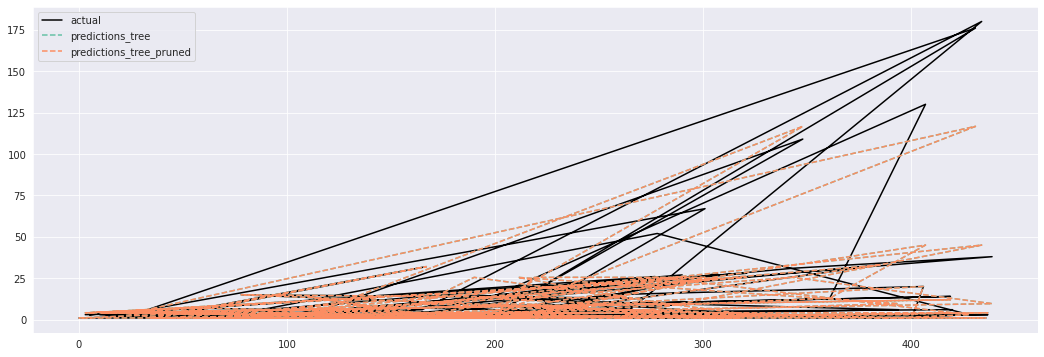

In [ ]:

df_plot = pd.DataFrame({"actual": test.label,
                        "predictions_tree": make_predictions(test, tree),
                        "predictions_tree_pruned": make_predictions(test, tree_pruned)})

df_plot.plot(figsize=(18, 6), color=["black", "#66c2a5", "#fc8d62"], style=["-", "--", "--"]);

## PART 4

###Print Tree


In [ ]:
#to print tree after pruning
pprint(tree_pruned)


{'ConfirmedForeignNational = 0': [{'Deaths = 2': [48.75,
                                                  {'Deaths = 1': [{'Cured = 3': [39.0,
                                                                                 {'ConfirmedIndianNational = 29': [29.0,
                                                                                                                   {'ConfirmedIndianNational = 33': [33.0,
                                                                                                                                                     {'ConfirmedIndianNational = 21': [21.0,
                                                                                                                                                                                       {'ConfirmedIndianNational = 20': [20.0,
                                                                                                                                                                        